In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for regression and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Load preprocessed/filtered dataset

# Set display options and styling
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-v0_8-whitegrid')

# Create output directories for plots and frames if they don't exist
import os
if not os.path.exists('../plots'):
    os.makedirs('../plots')
if not os.path.exists('../frames'):
    os.makedirs('../frames')

**Load Preprocessed Data**

In [10]:
# csv contains only games with 100 or more ratings.
filtered_df = pd.read_csv('../frames/filtered_games.csv')
print(f"Loaded {filtered_df.shape[0]} games from filtered_games.csv")
display(filtered_df.head())

# Use only numeric columns and drop the target column from the feature set
numeric_cols = filtered_df.select_dtypes(include=[np.number]).columns.tolist()
if 'AvgRating' in numeric_cols:
    numeric_cols.remove('AvgRating')

print("Using features:", numeric_cols)
# Drop Nan rows
df_clean = filtered_df[numeric_cols + ['AvgRating']].dropna()
# Here, feature matrix is X and target y (avg rating)
X = df_clean[numeric_cols]
y = df_clean["AvgRating"]

Loaded 12239 games from filtered_games.csv


,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Miniatures,Territory Building,Card Game,Educational,Puzzle,Collectible Components,Word Game,Print & Play,Electronic,Rating_Bracket
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,0,0,0,0,0,0,0,0,0,7-8
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,0,0,1,0,0,0,0,0,0,6-7
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,0,0,0,0,0,0,0,0,0,7-8
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,0,0,0,0,0,0,0,0,0,6-7
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,0,1,0,0,0,0,0,0,0,7-8


Using features: ['BGGId', 'YearPublished', 'GameWeight', 'BayesAvgRating', 'StdDev', 'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 'BestPlayers', 'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings', 'NumComments', 'NumAlternates', 'NumExpansions', 'NumImplementations', 'IsReimplementation', 'Kickstarted', 'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames', 'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens', 'Alliances', 'Area Majority / Influence', 'Auction/Bidding', 'Dice Rolling', 'Hand Management', 'Simultaneous Action Selection', 'Trick-taking', 'Hexagon Grid', 'Once-Per-Game Abilities', 'Set Collection', 'Tile Placement', 'Action Points', 'Investment', 'Market', 'Square Grid', 'Stock Holding', 'Victory Points as a Res

**Train Test Split**

In [11]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8087, 426)
Testing set shape: (2022, 426)


**Train the Linear Regression Model**

In [12]:
# create and fit model using sklearn!
model =  LinearRegression()
model.fit(X_train, y_train)

# Display ints and coeffs
print("Model Intercept:", model.intercept_)
print("Model Coefficients:")
for feature, coef in zip(numeric_cols, model.coef_):
    print(f"  {feature}: {coef:.4f}")

Model Intercept: 45.60871363754241
Model Coefficients:
  BGGId: 0.0000
  YearPublished: -0.0001
  GameWeight: 0.3061
  BayesAvgRating: 0.7341
  StdDev: -0.4857
  MinPlayers: -0.0105
  MaxPlayers: 0.0006
  ComAgeRec: 0.0126
  LanguageEase: 0.0000
  BestPlayers: -0.0511
  NumOwned: -0.0000
  NumWant: 0.0000
  NumWish: -0.0001
  NumWeightVotes: -0.0002
  MfgPlaytime: 0.0000
  ComMinPlaytime: -0.0000
  ComMaxPlaytime: 0.0000
  MfgAgeRec: -0.0073
  NumUserRatings: 0.0001
  NumComments: -0.0000
  NumAlternates: -0.0001
  NumExpansions: -0.0003
  NumImplementations: 0.0230
  IsReimplementation: 0.0033
  Kickstarted: 0.1119
  Rank:boardgame: -0.0000
  Rank:strategygames: 0.0001
  Rank:abstracts: -0.0002
  Rank:familygames: 0.0000
  Rank:thematic: 0.0000
  Rank:cgs: -0.0006
  Rank:wargames: -0.0002
  Rank:partygames: -0.0003
  Rank:childrensgames: -0.0008
  Cat:Thematic: 0.9653
  Cat:Strategy: 1.5113
  Cat:War: -4.2092
  Cat:Family: 0.6307
  Cat:CGS: -12.7807
  Cat:Abstract: -5.1679
  Cat:Party

**Evaluate the Model**

In [14]:
y_pred = model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# PRINT RESULTS
print("\nModel Performance:")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  R² Score: {r2:.4f}")


Model Performance:
  Mean Squared Error (MSE): 0.1219
  Mean Absolute Error (MAE): 0.2557
  R² Score: 0.8166


**Display Results**

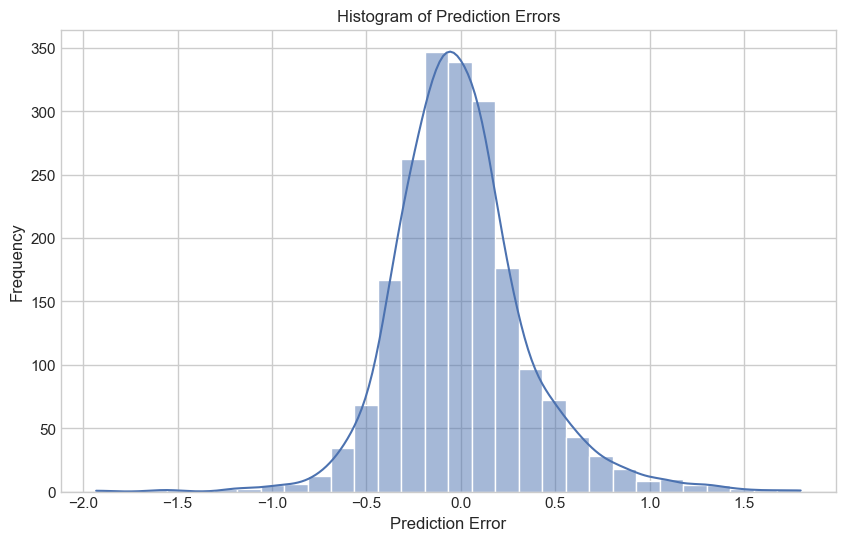

In [18]:

# Calculate errors
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Histogram of Prediction Errors")  # New title
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.savefig('../plots/histogram_prediction_errors.png')  # New filename
plt.show()
plt.close()